In [1]:
# Import required libraries 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix , classification_report,auc
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np

In [41]:
train = pd.read_csv("Train.csv")
display(train.head())
test = pd.read_csv("Test.csv")
display(test.head())

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


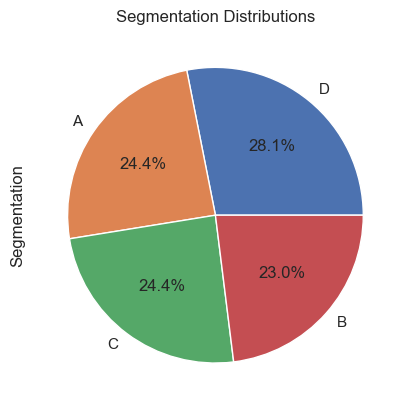

In [42]:
train['Segmentation'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Segmentation Distributions")
plt.show()

# Data Preprocessing

In [43]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


None

# Gender

In [46]:
train['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [47]:
test['Gender'].value_counts()

Male      1424
Female    1203
Name: Gender, dtype: int64

In [48]:
train['Gender'] = train['Gender'].replace({'Male':0,'Female':1})
test['Gender'] = test['Gender'].replace({'Male':0,'Female':1})

In [49]:
train['Gender'].value_counts()

0    4417
1    3651
Name: Gender, dtype: int64

In [50]:
test['Gender'].value_counts()

0    1424
1    1203
Name: Gender, dtype: int64

In [51]:
print(train['Gender'].isna().sum())
print(test['Gender'].isna().sum())

0
0


# Ever Married

In [52]:
print(train['Ever_Married'].isna().sum())
print(test['Ever_Married'].isna().sum())

140
50


In [53]:
train['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [54]:
test['Ever_Married'].value_counts()

Yes    1520
No     1057
Name: Ever_Married, dtype: int64

In [55]:
train['Ever_Married'] = train['Ever_Married'].replace({'No':0,'Yes':1})
test['Ever_Married'] = test['Ever_Married'].replace({'No':0,'Yes':1})

In [56]:
train['Ever_Married'] = train['Ever_Married'].fillna(1)
test['Ever_Married'] = test['Ever_Married'].fillna(1)

In [57]:
train['Ever_Married'].value_counts()

1.0    4783
0.0    3285
Name: Ever_Married, dtype: int64

test['Ever_Married'].value_counts()

# Age

In [59]:
print(train['Age'].isna().sum())
print(test['Age'].isna().sum())

0
0


# Graduated

In [60]:
print(train['Graduated'].isna().sum())
print(test['Graduated'].isna().sum())

78
24


In [61]:
train['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [62]:
test['Graduated'].value_counts()

Yes    1602
No     1001
Name: Graduated, dtype: int64

In [63]:
train['Graduated'] = train['Graduated'].replace({'No':0,'Yes':1})
test['Graduated'] = test['Graduated'].replace({'No':0,'Yes':1})

In [64]:
train['Graduated'] = train['Graduated'].fillna(1)
test['Graduated'] = test['Graduated'].fillna(1)

In [65]:
print(train['Graduated'].isna().sum())
print(test['Graduated'].isna().sum())

0
0


# Profession

In [66]:
print(train['Profession'].isna().sum())
print(test['Profession'].isna().sum())

124
38


In [67]:
train['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [69]:
l = test['Profession'].unique().tolist()
l

['Engineer',
 'Healthcare',
 nan,
 'Executive',
 'Marketing',
 'Doctor',
 'Artist',
 'Lawyer',
 'Entertainment',
 'Homemaker']

In [70]:
train['Profession']= train['Profession'].replace({'Engineer':0,'Healthcare':1,'Executive':2,'Marketing':3,
                        'Doctor':4,'Artist':5,'Lawyer':6,'Entertainment':7,'Homemaker':8})

test['Profession']= test['Profession'].replace({'Engineer':0,'Healthcare':1,'Executive':2,'Marketing':3,
                        'Doctor':4,'Artist':5,'Lawyer':6,'Entertainment':7,'Homemaker':8})

In [71]:
train['Profession'] = train['Profession'].fillna(5)
test['Profession'] = test['Profession'].fillna(5)

In [72]:
print(train['Profession'].isna().sum())
print(test['Profession'].isna().sum())

0
0


# Work Experience

In [73]:
train['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [82]:
test['Work_Experience'].value_counts()

1.0     1042
0.0      769
8.0      149
9.0      139
4.0       93
2.0       87
3.0       82
5.0       76
6.0       61
7.0       60
14.0      21
11.0      14
12.0      12
13.0      11
10.0      11
Name: Work_Experience, dtype: int64

In [74]:
print(train['Work_Experience'].isna().sum())
print(test['Work_Experience'].isna().sum())

829
269


In [75]:
train['Work_Experience'].describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [83]:
test['Work_Experience'].describe()

count    2627.000000
mean        2.393605
std         3.200165
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [76]:
train['Work_Experience'] = train['Work_Experience'].fillna(1)
test['Work_Experience'] = test['Work_Experience'].fillna(1)

In [77]:
print(train['Work_Experience'].isna().sum())
print(test['Work_Experience'].isna().sum())

0
0


# Spending Score

In [78]:
train['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [84]:
test['Spending_Score'].value_counts()

0    1616
1     625
2     386
Name: Spending_Score, dtype: int64

In [79]:
print(train['Spending_Score'].isna().sum())
print(test['Spending_Score'].isna().sum())

0
0


In [80]:
train['Spending_Score'] = train['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
test['Spending_Score'] = test['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [81]:
print(train['Spending_Score'].value_counts())
print(test['Spending_Score'].value_counts())

0    4878
1    1974
2    1216
Name: Spending_Score, dtype: int64
0    1616
1     625
2     386
Name: Spending_Score, dtype: int64


# Family Size 

In [85]:
print(train['Family_Size'].isna().sum())
print(test['Family_Size'].isna().sum())

335
113


In [86]:
train['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [87]:
test['Family_Size'].value_counts()

2.0    768
1.0    512
3.0    455
4.0    444
5.0    200
6.0     78
7.0     26
9.0     16
8.0     15
Name: Family_Size, dtype: int64

In [88]:
train['Family_Size'] = train['Family_Size'].fillna(2)
test['Family_Size'] = test['Family_Size'].fillna(2)

In [89]:
print(train['Family_Size'].isna().sum())
print(test['Family_Size'].isna().sum())

0
0


# Var_1

In [90]:
print(train['Var_1'].isna().sum())
print(test['Var_1'].isna().sum())

76
32


In [91]:
train['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [92]:
test['Var_1'].value_counts()

Cat_6    1672
Cat_4     386
Cat_3     267
Cat_2     141
Cat_7      66
Cat_1      34
Cat_5      29
Name: Var_1, dtype: int64

In [93]:
train['Var_1'] = train['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
test['Var_1'] = test['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [94]:
train['Var_1'] = train['Var_1'].fillna(6)
test['Var_1'] = test['Var_1'].fillna(6)

In [95]:
print(train['Var_1'].isna().sum())
print(test['Var_1'].isna().sum())

0
0


# Segmentation 

In [96]:
print(train['Segmentation'].isna().sum())
print(test['Segmentation'].isna().sum())

0
0


In [97]:
print(train['Segmentation'].value_counts())
print(test['Segmentation'].value_counts())

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64
A    846
D    759
B    550
C    472
Name: Segmentation, dtype: int64


In [98]:
train['Segmentation'] = train['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})
test['Segmentation'] = test['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [99]:
print(train['Segmentation'].value_counts())
print(test['Segmentation'].value_counts())

3    2268
0    1972
2    1970
1    1858
Name: Segmentation, dtype: int64
0    846
3    759
1    550
2    472
Name: Segmentation, dtype: int64


# Feature Selection 

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Assuming your features are stored in X and the target variable in y
X = train.drop(['ID', 'Segmentation'], axis=1)  # Exclude non-feature columns
y = train['Segmentation']

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)

           Feature  Importance
2              Age    0.376032
5  Work_Experience    0.147823
4       Profession    0.128486
7      Family_Size    0.110397
8            Var_1    0.082126
6   Spending_Score    0.050210
0           Gender    0.037974
3        Graduated    0.036344
1     Ever_Married    0.030608


In [113]:
# Compute the correlation matrix
correlation_matrix = train.corr()

# Print correlation with the target variable ('Segmentation' in this case)
print(correlation_matrix['Segmentation'].sort_values(ascending=False))

Segmentation       1.000000
Family_Size        0.185486
Work_Experience    0.008216
ID                -0.009104
Var_1             -0.018339
Gender            -0.026403
Spending_Score    -0.109837
Graduated         -0.178683
Ever_Married      -0.213730
Profession        -0.224462
Age               -0.243552
Name: Segmentation, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances using a bar plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()

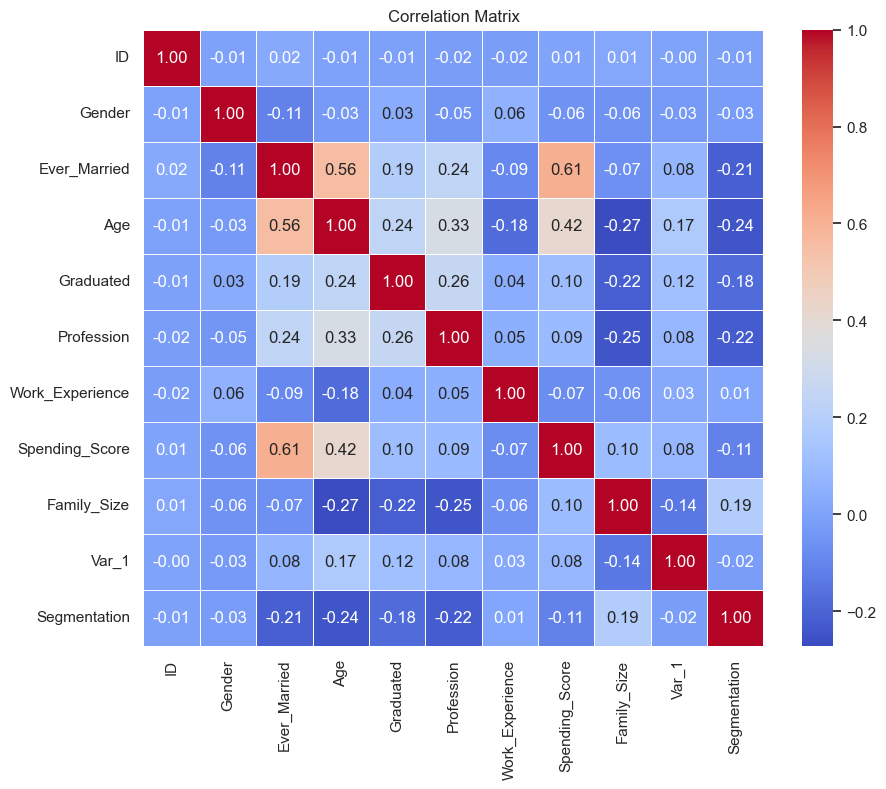

In [112]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = train.corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Split the data

In [114]:
x_train = train.drop(['ID','Segmentation'],axis=1)
y_train = train['Segmentation']

In [115]:
x_test = test.drop(['ID','Segmentation'],axis=1)
y_test = test['Segmentation']

In [116]:
x_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0
1,1,1.0,38,1.0,0.0,1.0,1,3.0,4.0
2,1,1.0,67,1.0,0.0,1.0,0,1.0,6.0
3,0,1.0,67,1.0,6.0,0.0,2,2.0,6.0
4,1,1.0,40,1.0,7.0,1.0,2,6.0,6.0
...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,5.0,0.0,0,7.0,1.0
8064,0,0.0,35,0.0,2.0,3.0,0,4.0,4.0
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,6.0
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,6.0


In [117]:
x_test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1.0,36,1.0,0.0,0.0,0,1.0,6.0
1,0,1.0,37,1.0,1.0,8.0,1,4.0,6.0
2,1,1.0,69,0.0,5.0,0.0,0,1.0,6.0
3,0,1.0,59,0.0,2.0,11.0,2,2.0,6.0
4,1,0.0,19,0.0,3.0,1.0,0,4.0,6.0
...,...,...,...,...,...,...,...,...,...
2622,0,0.0,29,0.0,1.0,9.0,0,4.0,6.0
2623,1,0.0,35,1.0,4.0,1.0,0,1.0,6.0
2624,1,0.0,53,1.0,7.0,1.0,0,2.0,6.0
2625,0,1.0,47,1.0,2.0,1.0,2,5.0,4.0


In [118]:
y_train.values

array([3, 0, 1, ..., 3, 1, 1], dtype=int64)

In [119]:
y_test.values

array([1, 0, 0, ..., 2, 2, 0], dtype=int64)

# Scale the Data

In [126]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_df = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_df = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [127]:
x_train_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,0.0,0.056338,0.0,0.125,0.071429,0.0,0.375,0.500000
1,1.0,1.0,0.281690,1.0,0.000,0.071429,0.5,0.250,0.500000
2,1.0,1.0,0.690141,1.0,0.000,0.071429,0.0,0.000,0.833333
3,0.0,1.0,0.690141,1.0,0.750,0.000000,1.0,0.125,0.833333
4,1.0,1.0,0.309859,1.0,0.875,0.071429,1.0,0.625,0.833333


In [128]:
x_test_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1.0,1.0,0.253521,1.0,0.000,0.000000,0.0,0.000,0.833333
1,0.0,1.0,0.267606,1.0,0.125,0.571429,0.5,0.375,0.833333
2,1.0,1.0,0.718310,0.0,0.625,0.000000,0.0,0.000,0.833333
3,0.0,1.0,0.577465,0.0,0.250,0.785714,1.0,0.125,0.833333
4,1.0,0.0,0.014085,0.0,0.375,0.071429,0.0,0.375,0.833333


In [130]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(x_test)

# Build K-Means Model

In [138]:
from sklearn.cluster import KMeans

# Specify the number of clusters (you need to choose an appropriate value for your use case)
n_clusters = 4

# Initialize the KMeans model with the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the KMeans model to the scaled training data
kmeans.fit(X_train_scaled)

# Get cluster labels for each data point in the training data
train_cluster_labels = kmeans.labels_

# Print counts of data points in each cluster
print("Number of data points in each cluster:")
print(pd.Series(train_cluster_labels).value_counts())
print("Number of actual data points in each cluster")
print(y_train.value_counts())

Number of data points in each cluster:
3    2839
0    1944
2    1693
1    1592
dtype: int64
Number of actual data points in each cluster
3    2268
0    1972
2    1970
1    1858
Name: Segmentation, dtype: int64


In [139]:
test_cluster_labels = kmeans.predict(X_test_scaled)

# Print counts of data points in each cluster for the test data
print("Number of data points in each cluster (Test Data):")
print(pd.Series(test_cluster_labels).value_counts())

# Print actual data points in each cluster for the test data
print("Number of actual data points in each cluster (Test Data):")
print(y_test.value_counts())

Number of data points in each cluster (Test Data):
3    917
0    653
2    531
1    526
dtype: int64
Number of actual data points in each cluster (Test Data):
0    846
3    759
1    550
2    472
Name: Segmentation, dtype: int64


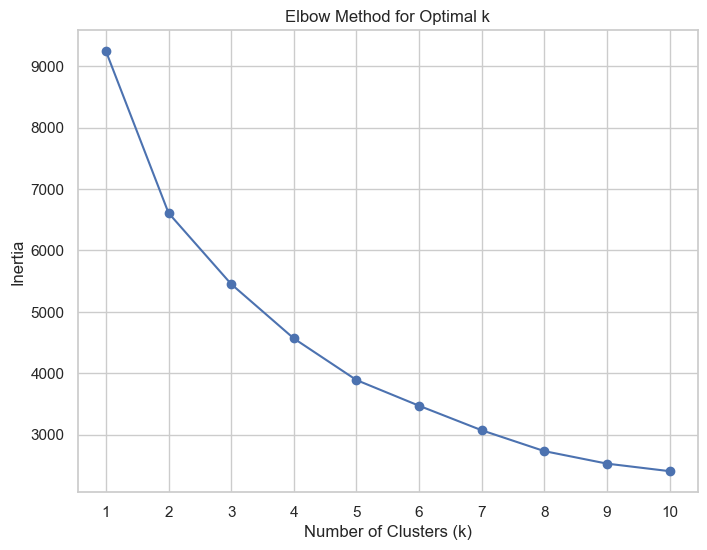

In [140]:
# Calculate inertia for different cluster values (k) and visualize it using the elbow method
inertia_values = []
cluster_range = range(1, 11)  # Try different cluster values from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia_values.append(kmeans.inertia_)

# Visualize inertia values using the elbow method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(cluster_range)
plt.show()